# Exploratory Data Analysis on the AirBnB data


### Importing of Libraries 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


from sklearn.utils import resample

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
zhdf = pd.read_csv("listings_june.csv")

air_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


# Extracting the response 

In [4]:
air_data["review_scores_rating"] = air_data["review_scores_rating"].round(1)
ratings = pd.DataFrame(air_data["review_scores_rating"])
ratings.shape

(4238, 1)

In [5]:
ratings.isna().sum()

review_scores_rating    1759
dtype: int64

In [6]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4238 non-null   int64  
 1   listing_url                                   4238 non-null   object 
 2   scrape_id                                     4238 non-null   int64  
 3   last_scraped                                  4238 non-null   object 
 4   name                                          4238 non-null   object 
 5   description                                   4091 non-null   object 
 6   neighborhood_overview                         2791 non-null   object 
 7   picture_url                                   4238 non-null   object 
 8   host_id                                       4238 non-null   int64  
 9   host_url                                      4238 non-null   o

In [7]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')
#air_data = air_data.select_dtypes(exclude=['object'])
#air_data.info()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/174682891.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


In [8]:
#f = plt.figure(figsize=(24, 24))
#sb.heatmap(air_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## All unique amenities in the top 100 rated AirBnB


In [9]:
top_air = air_data.sort_values(by=['review_scores_rating'])
top_air = top_air[0:100]
top_air.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1350,22458255,https://www.airbnb.com/rooms/22458255,20210629180711,2021-06-29,Cosy Place with good food in the vicinity !,Studio apartment with a queen size bed that is...,NaN,https://a0.muscache.com/pictures/3d4bcf43-212f...,6578888,https://www.airbnb.com/users/show/6578888,...,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02
949,17899942,https://www.airbnb.com/rooms/17899942,20210629180711,2021-06-29,~Entire Condo Apartment in Downtown -3 MRTs,"My place is close to the city centre, parks, a...",[Nearby Places]<br />1. City Square Mall: <br ...,https://a0.muscache.com/pictures/babe501b-992e...,21149720,https://www.airbnb.com/users/show/21149720,...,NaN,NaN,NaN,NaN,f,16,16,0,0,0.02
1220,21214988,https://www.airbnb.com/rooms/21214988,20210629180711,2021-06-30,Luxury place,New renovated <br />High tech decor <br />Wind...,NaN,https://a0.muscache.com/pictures/9332d3ed-3c39...,149095282,https://www.airbnb.com/users/show/149095282,...,NaN,NaN,NaN,NaN,t,2,0,2,0,0.05
2765,39825497,https://www.airbnb.com/rooms/39825497,20210629180711,2021-06-30,Cozy Common Room with Balcony,Close to downtown and very quite and cozy plac...,NaN,https://a0.muscache.com/pictures/d20e1dad-7392...,153133444,https://www.airbnb.com/users/show/153133444,...,NaN,NaN,NaN,NaN,t,1,0,1,0,0.05
3665,45779283,https://www.airbnb.com/rooms/45779283,20210629180711,2021-06-30,圣淘沙安曼纳圣殿度假酒店,《如果此房间已订满请加我微信：weirenjin888有很多低价酒店名宿，都是会员价》新加坡...,NaN,https://a0.muscache.com/pictures/60d77986-41d5...,361802160,https://www.airbnb.com/users/show/361802160,...,NaN,NaN,NaN,NaN,t,1,0,1,0,0.26


In [10]:
top_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1350 to 3226
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            100 non-null    int64  
 1   listing_url                                   100 non-null    object 
 2   scrape_id                                     100 non-null    int64  
 3   last_scraped                                  100 non-null    object 
 4   name                                          100 non-null    object 
 5   description                                   91 non-null     object 
 6   neighborhood_overview                         47 non-null     object 
 7   picture_url                                   100 non-null    object 
 8   host_id                                       100 non-null    int64  
 9   host_url                                      100 non-null   

In [11]:
top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["amenities"] =top_air["amenities"].to_frame()
top_air["amenities"].head()


C:\Users\User\AppData\Local\Temp/ipykernel_21324/3206109549.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')


1350    TV, Pool, Air conditioning, Gym, Hair dryer, E...
949     TV, Pool, Elevator, Cooking basics, Kitchen, E...
1220    Air conditioning, Kitchen, Hangers, Elevator, ...
2765    TV, Air conditioning, Kitchen, Hangers, Elevat...
3665    Heating, Air conditioning, Hangers, Elevator, ...
Name: amenities, dtype: object

In [12]:
top_amenities =  pd.DataFrame(''.join(top_air["amenities"]).lower().split(',')).value_counts()
top_amenities = top_air['amenities'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_amenities = top_amenities.rename_axis('amenities').reset_index(name='count')

C:\Users\User\AppData\Local\Temp/ipykernel_21324/1280987478.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["host_verifications"]=top_air['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','').str.replace('/', '').str.replace("'", '')


<AxesSubplot:xlabel='count', ylabel='host_verifications'>

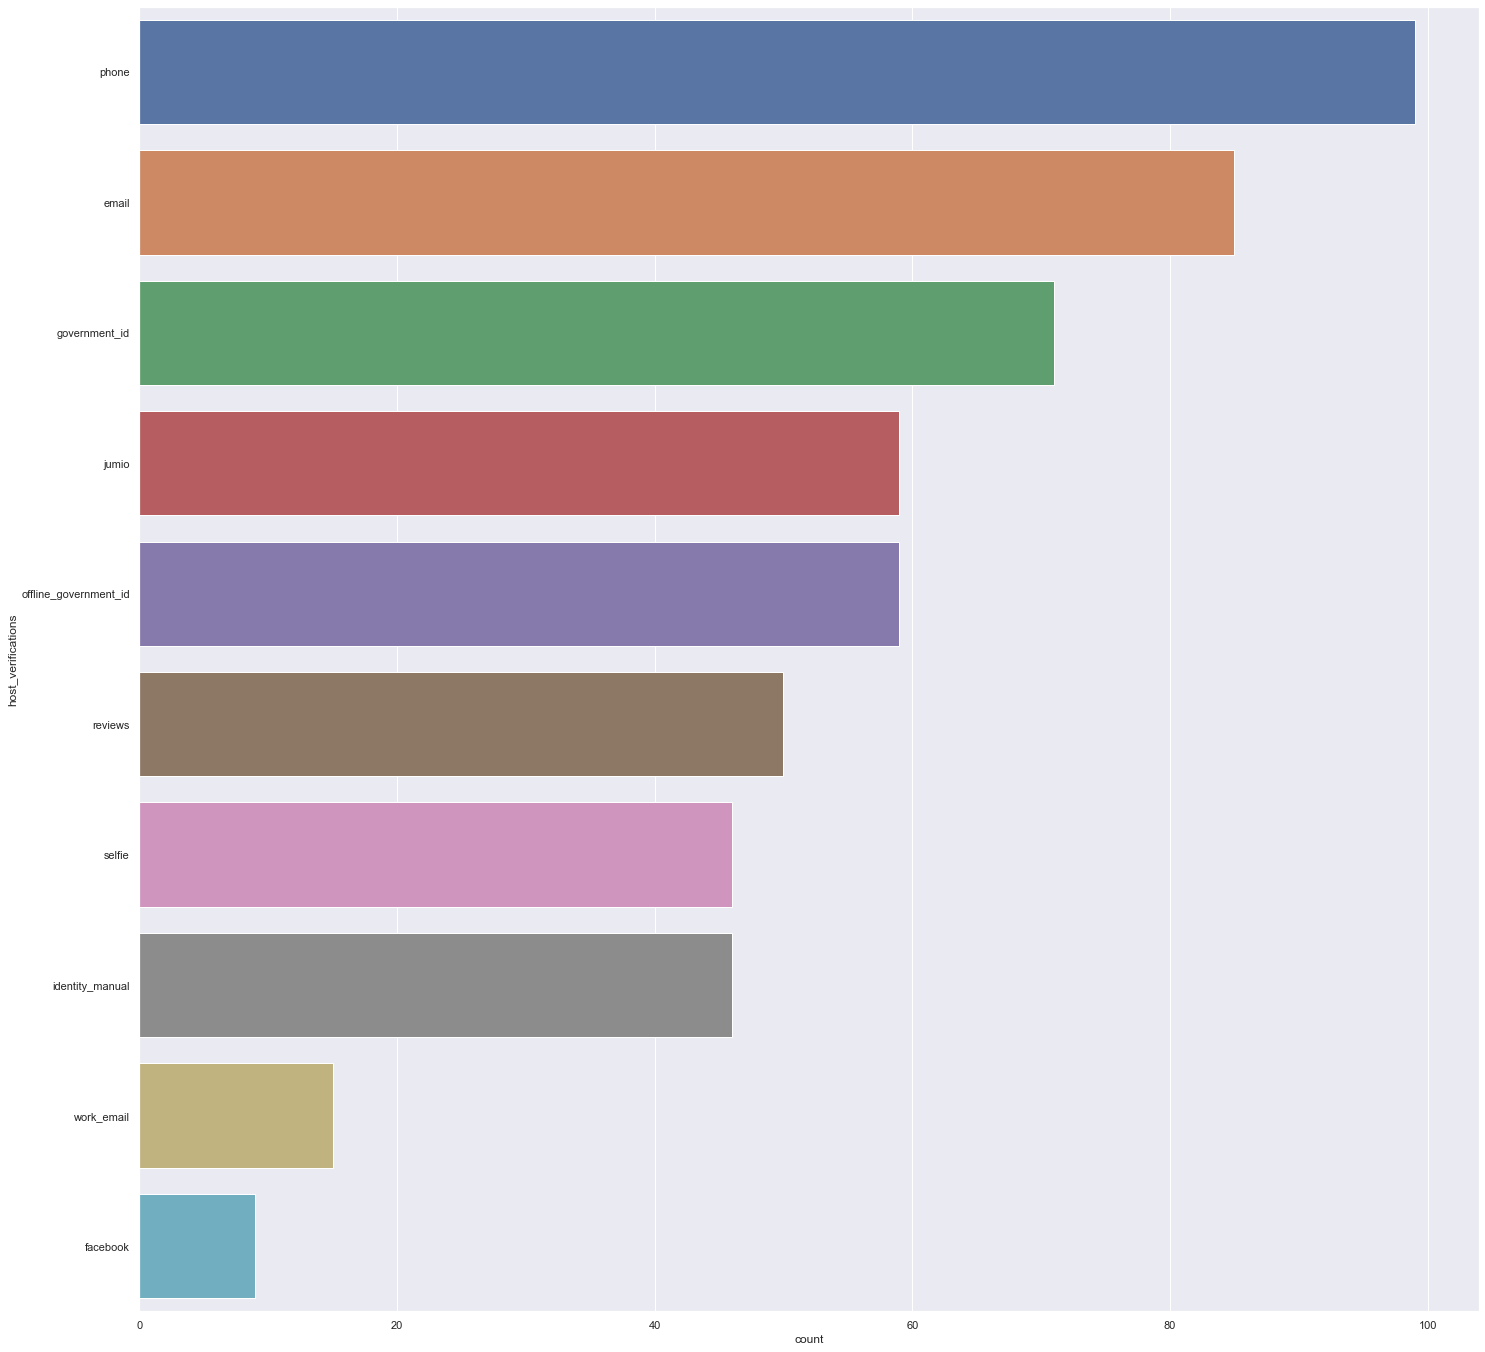

In [13]:
top_air["host_verifications"]=top_air['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','').str.replace('/', '').str.replace("'", '')
top_air["num_of_veri"]= top_air["host_verifications"].apply(lambda n: len(n.split(',')))
top_air["num_of_veri"] =top_air["num_of_veri"].to_frame()
top_air["num_of_veri"].head()


top_v =  pd.DataFrame(''.join(top_air["host_verifications"]).lower().split(',')).value_counts()
top_v = top_air['host_verifications'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_v = top_v.rename_axis('host_verifications').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="host_verifications", data=top_v,orient = "h")

<AxesSubplot:xlabel='count', ylabel='amenities'>

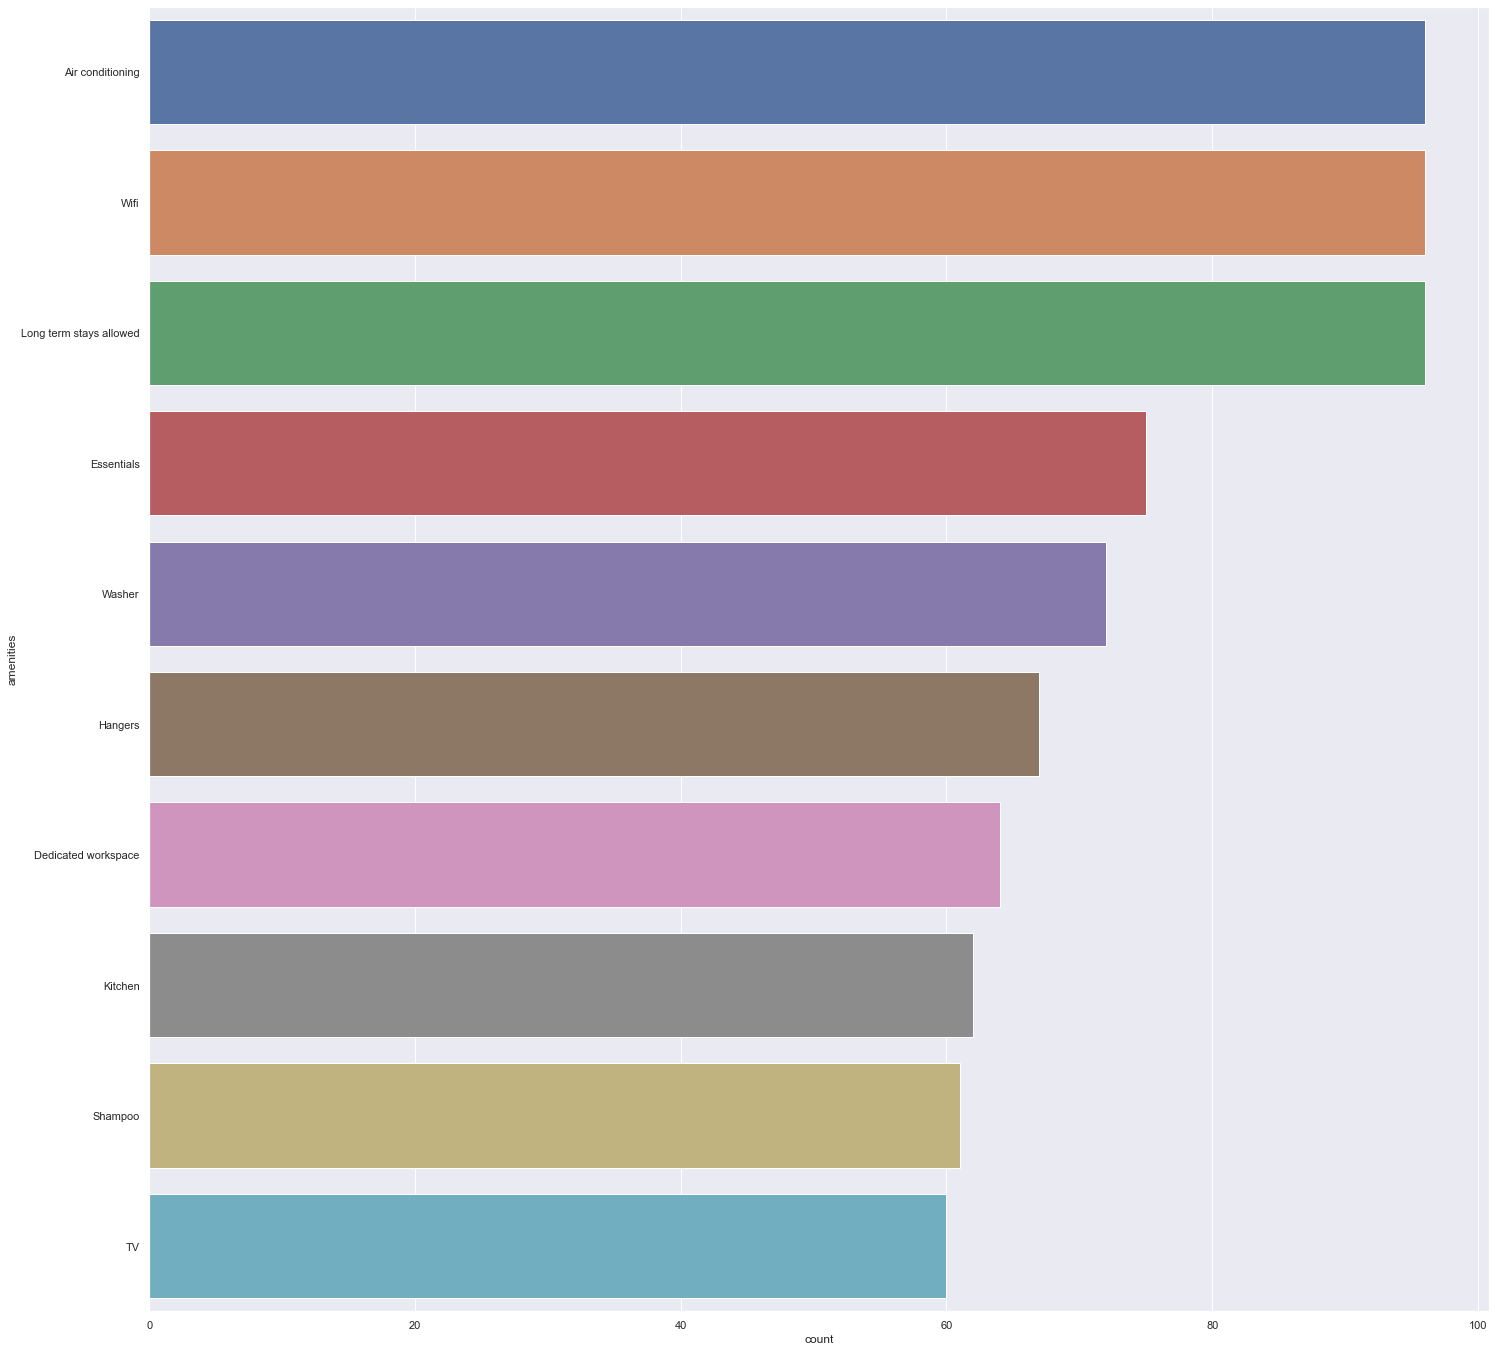

In [14]:
top_air["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
top_air["num_of_amenities"].head()
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="amenities", data=top_amenities,orient = "h")

In [15]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(top_amenities)

                 amenities  count
0         Air conditioning     96
1                     Wifi     96
2  Long term stays allowed     96
3               Essentials     75
4                   Washer     72
5                  Hangers     67
6      Dedicated workspace     64
7                  Kitchen     62
8                  Shampoo     61
9                       TV     60


# Property Type of the top Rated places|

In [16]:
top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["property_type"] =top_air["property_type"].to_frame()
top_air["property_type"].head()


C:\Users\User\AppData\Local\Temp/ipykernel_21324/3712839184.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')


1350               Entire apartment
949              Entire condominium
1220    Private room in condominium
2765    Private room in condominium
3665         Room in boutique hotel
Name: property_type, dtype: object

<AxesSubplot:xlabel='count', ylabel='property_type'>

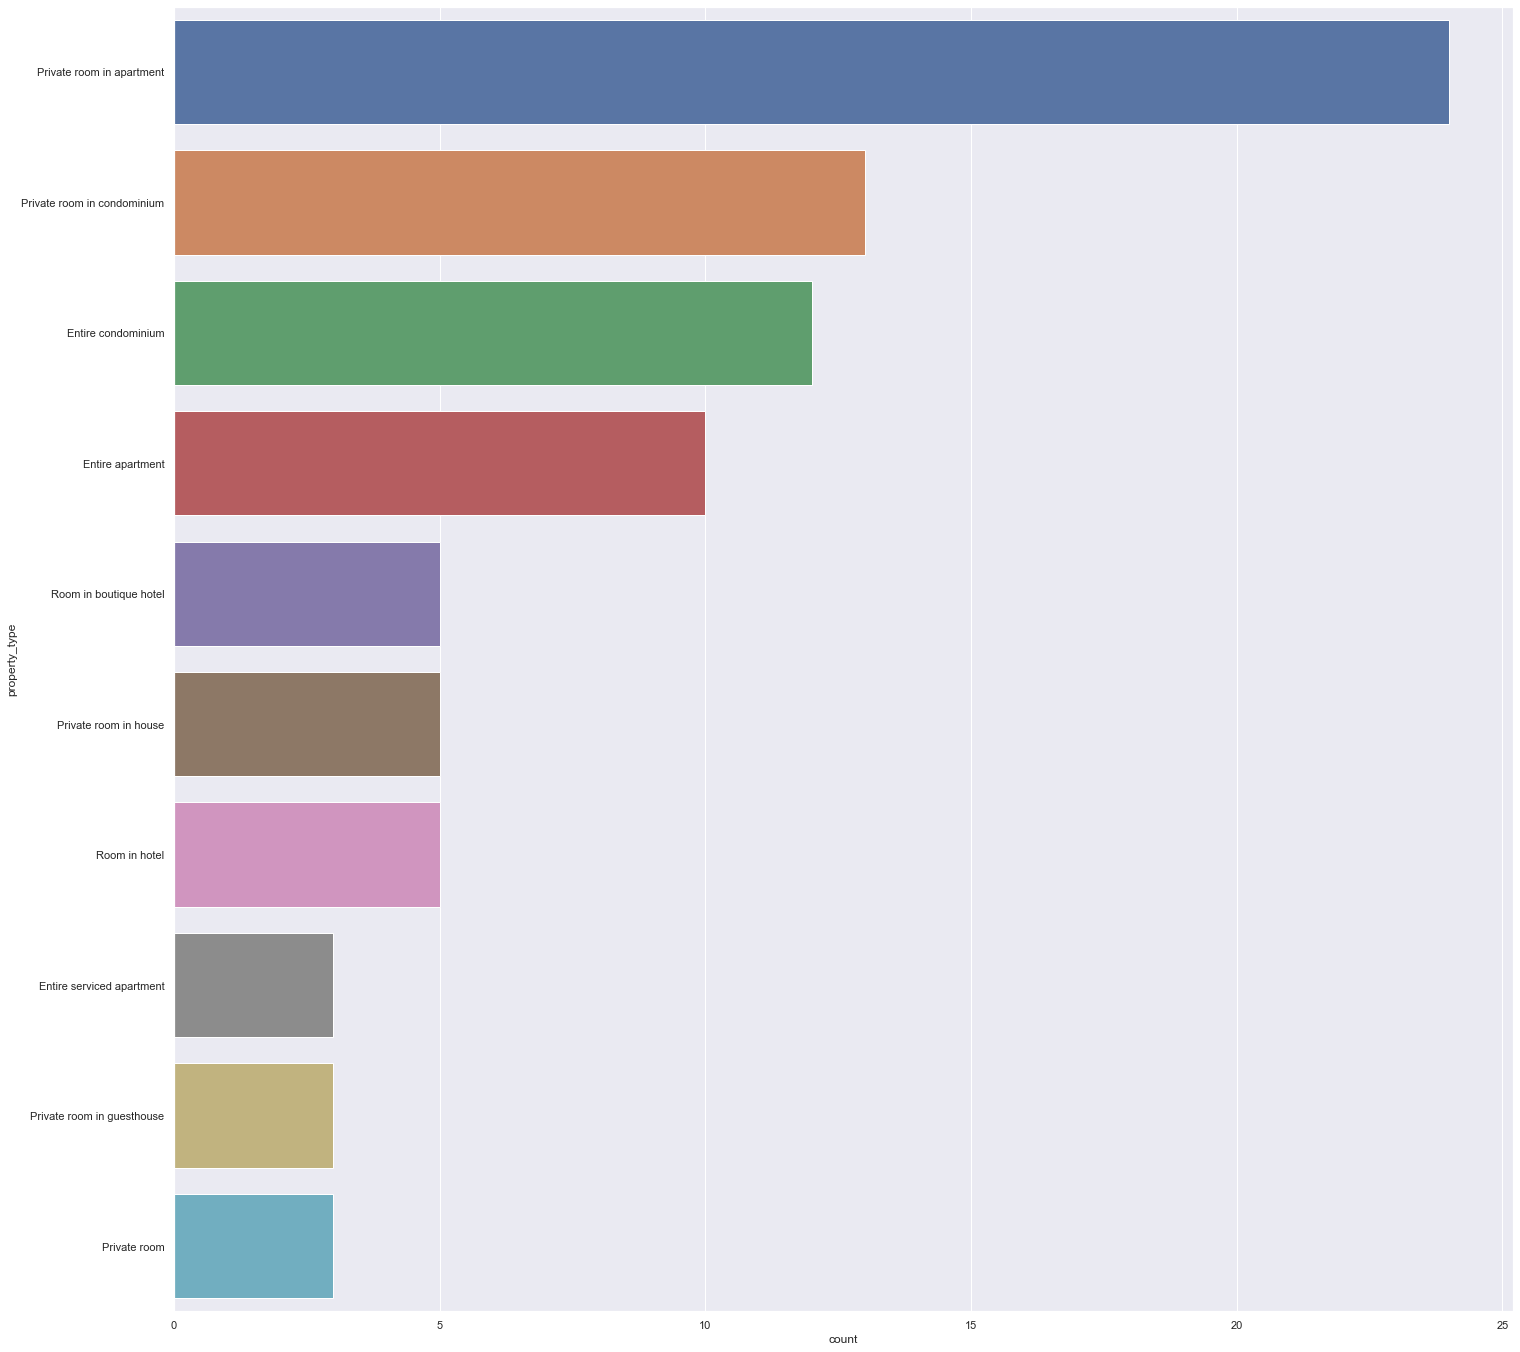

In [17]:
top_ptype = top_air['property_type'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_ptype = top_ptype.rename_axis('property_type').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="property_type", data=top_ptype,orient = "h")

In [18]:
top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["neighbourhood_cleansed"] =top_air["neighbourhood_cleansed"].to_frame()
top_air["neighbourhood_cleansed"].head()

top_neig = top_air['neighbourhood_cleansed'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_neig = top_neig.rename_axis('neighbourhood_cleansed').reset_index(name='count')


C:\Users\User\AppData\Local\Temp/ipykernel_21324/1639407068.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')


<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

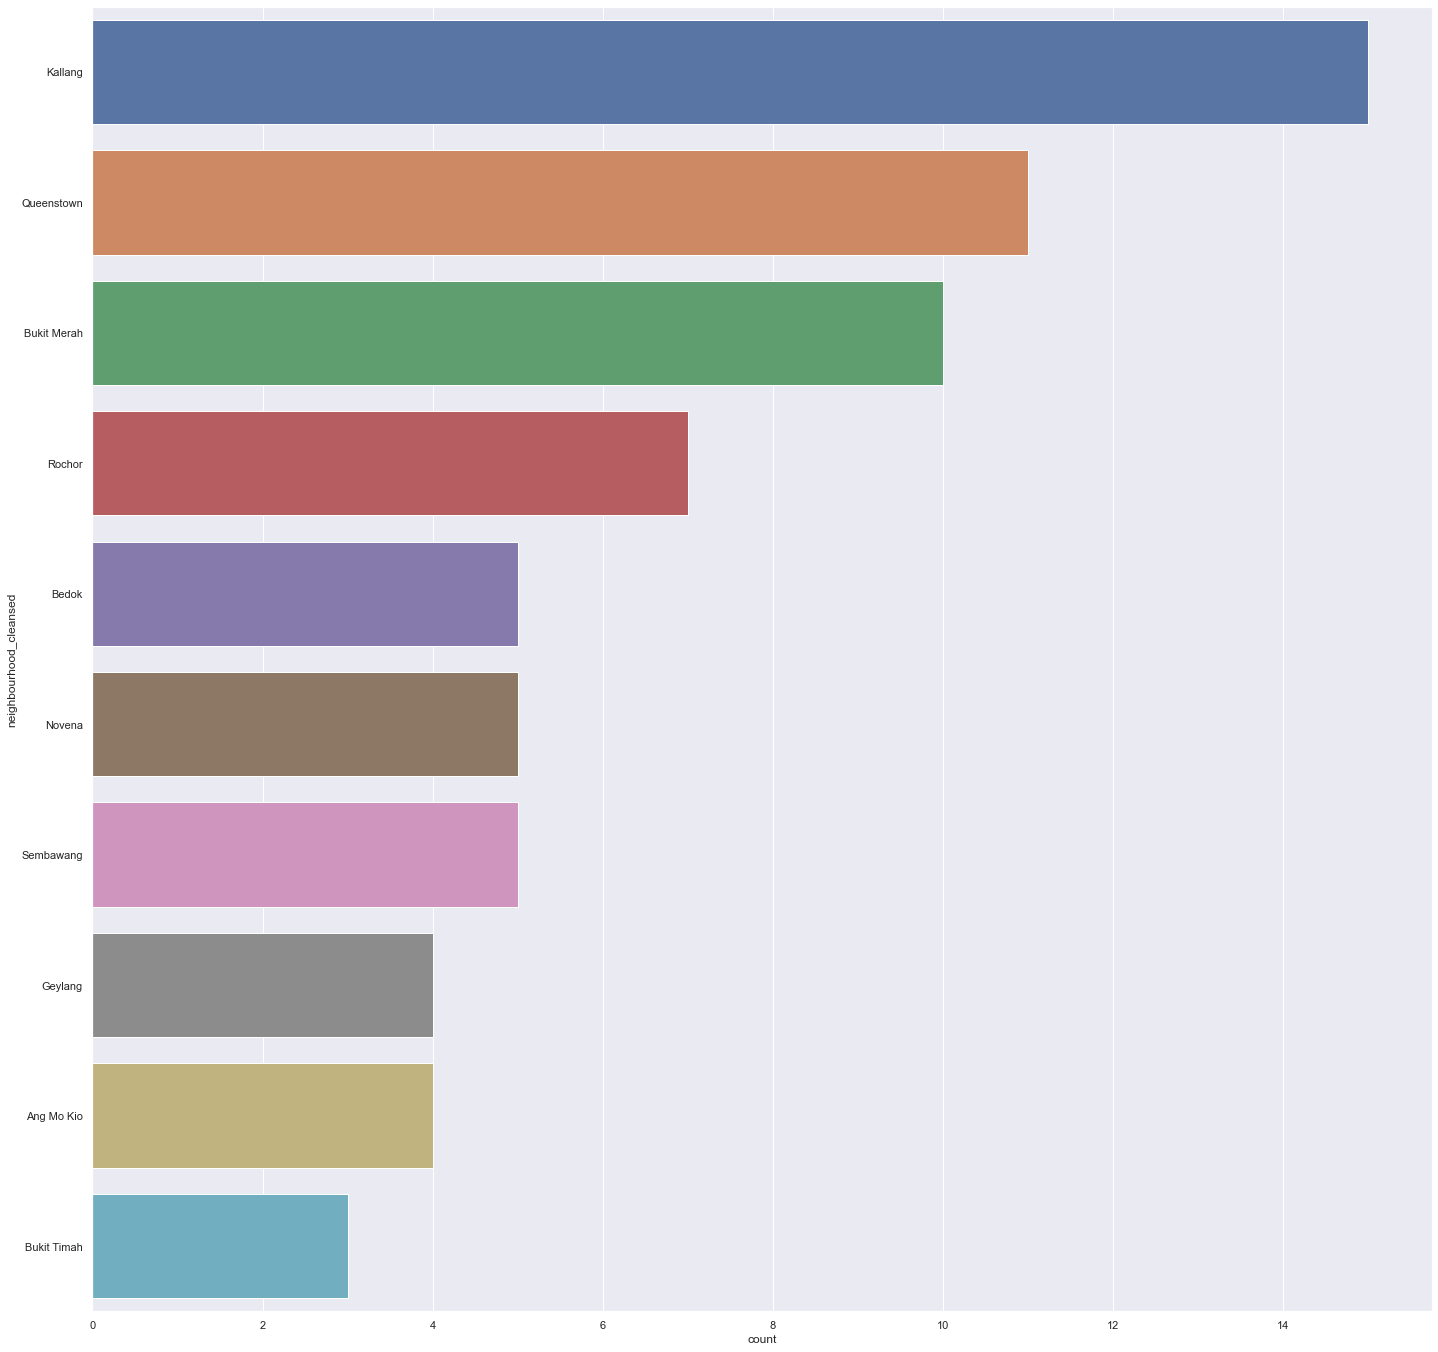

In [19]:
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="neighbourhood_cleansed", data=top_neig,orient = "h")

In [20]:
top_air["name"] = top_air["name"].str.replace(r'<[^<>]*>', ' ', regex=True)
#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
top_air["name"] = top_air["name"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(top_air["name"])
des["name"] = des["name"].str.replace('\d+', ' ', regex=True)
des.head()
top_words =  pd.DataFrame(' '.join(des["name"]).lower().split()).value_counts()[:50]
top_words = top_words.rename_axis('top_words').reset_index(name='count')
top_words.head()

,top_words,count
0,room,36
1,in,17
2,for,13
3,mrt,12
4,br,11


In [21]:
print_full(top_words)

    top_words  count
0        room     36
1          in     17
2         for     13
3         mrt     12
4          br     11
5          to     11
6        near     10
7      studio     10
8       condo     10
9     private     10
10        bed      9
11       cozy      7
12     single      7
13      hotel      7
14         at      6
15       view      6
16  apartment      6
17       city      6
18      suite      6
19       cosy      6
20        the      5
21  singapore      5
22       with      5
23        min      5
24       park      5
25     master      4
26         of      4
27     double      4
28     novena      4
29     family      4
30     common      4
31     center      4
32       king      4
33         rm      4
34    bedroom      4
35     outram      4
36       haji      3
37    orchard      3
38   heritage      3
39     luxury      3
40   queenbed      3
41    explore      3
42      prime      3
43       nice      3
44        rma      3
45       lane      3
46     deluxe

In [22]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Word Cloud to see most popular words

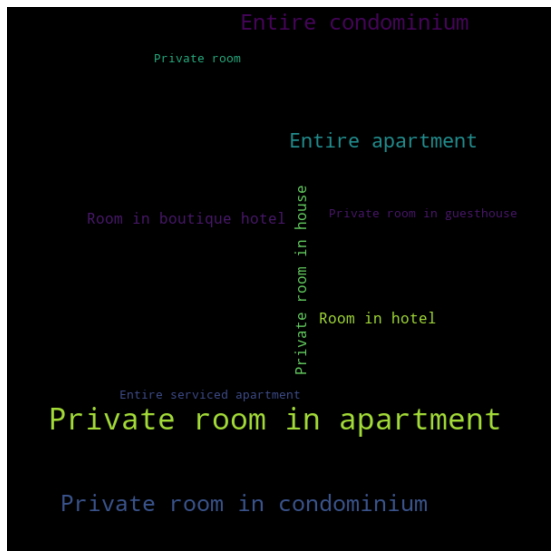

In [23]:
from wordcloud import WordCloud

d = dict(zip(top_ptype['property_type'], top_ptype['count']))


wordcloud = WordCloud(background_color="black",width=600, height=600).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

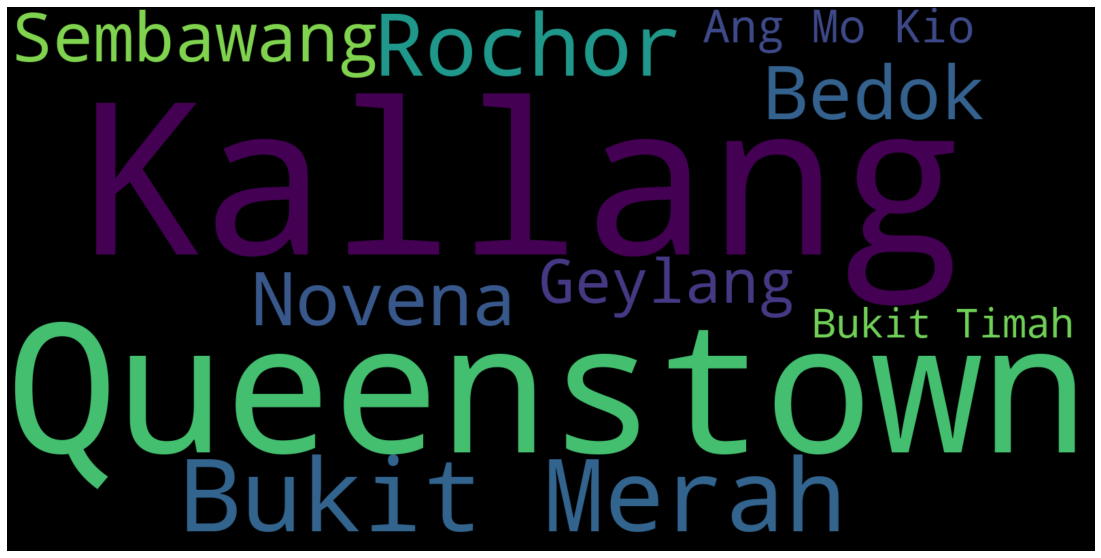

In [24]:
d = dict(zip(top_neig['neighbourhood_cleansed'], top_neig['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

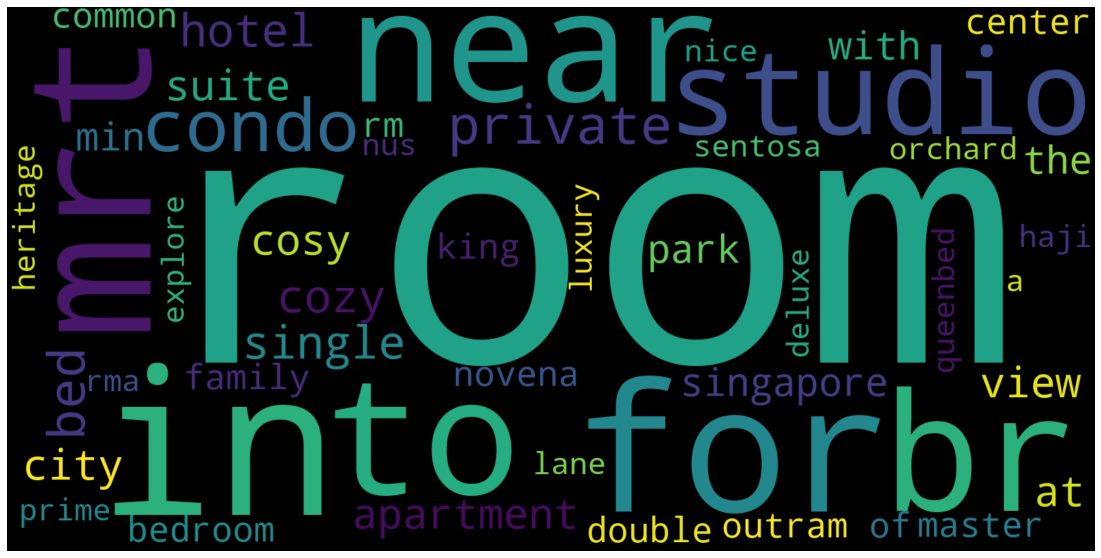

In [25]:

d = dict(zip(top_words['top_words'], top_words['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bar Plots for numerical values

In [26]:
test = pd.DataFrame(air_data[['price','review_scores_rating']])

<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

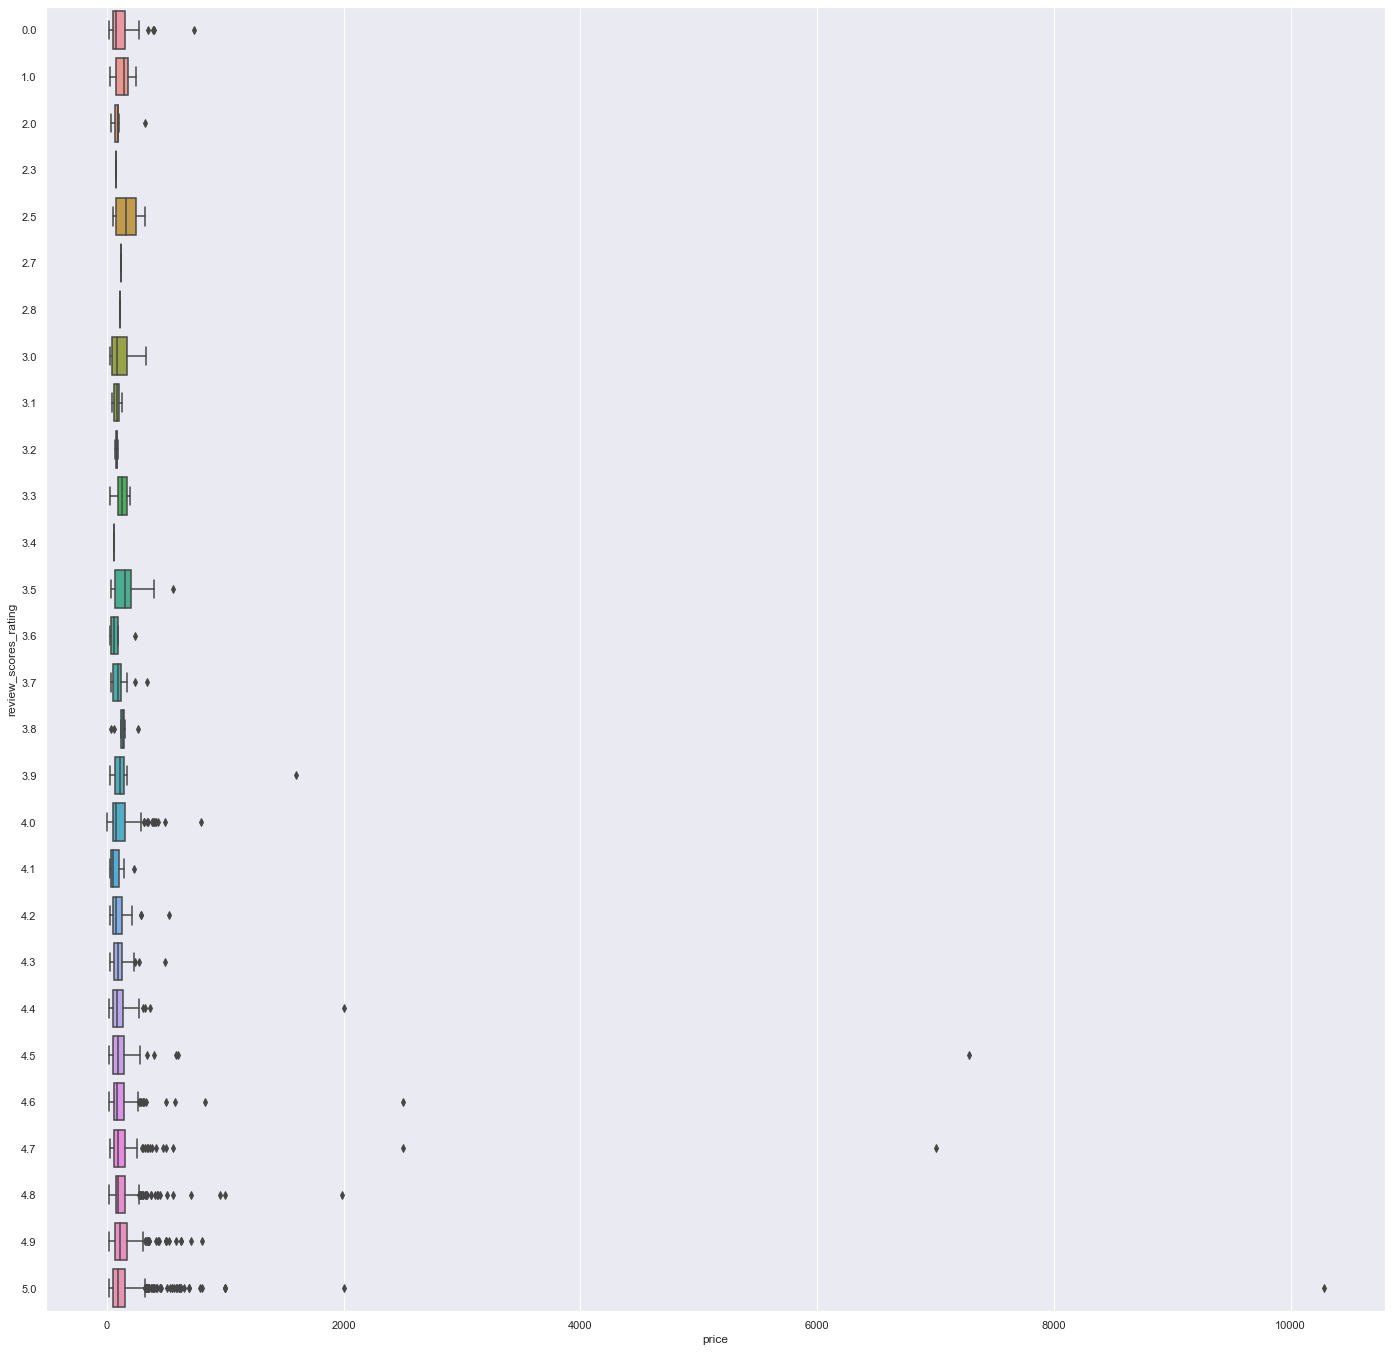

In [27]:
test = pd.DataFrame(air_data[['price','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='price', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_amenities', ylabel='review_scores_rating'>

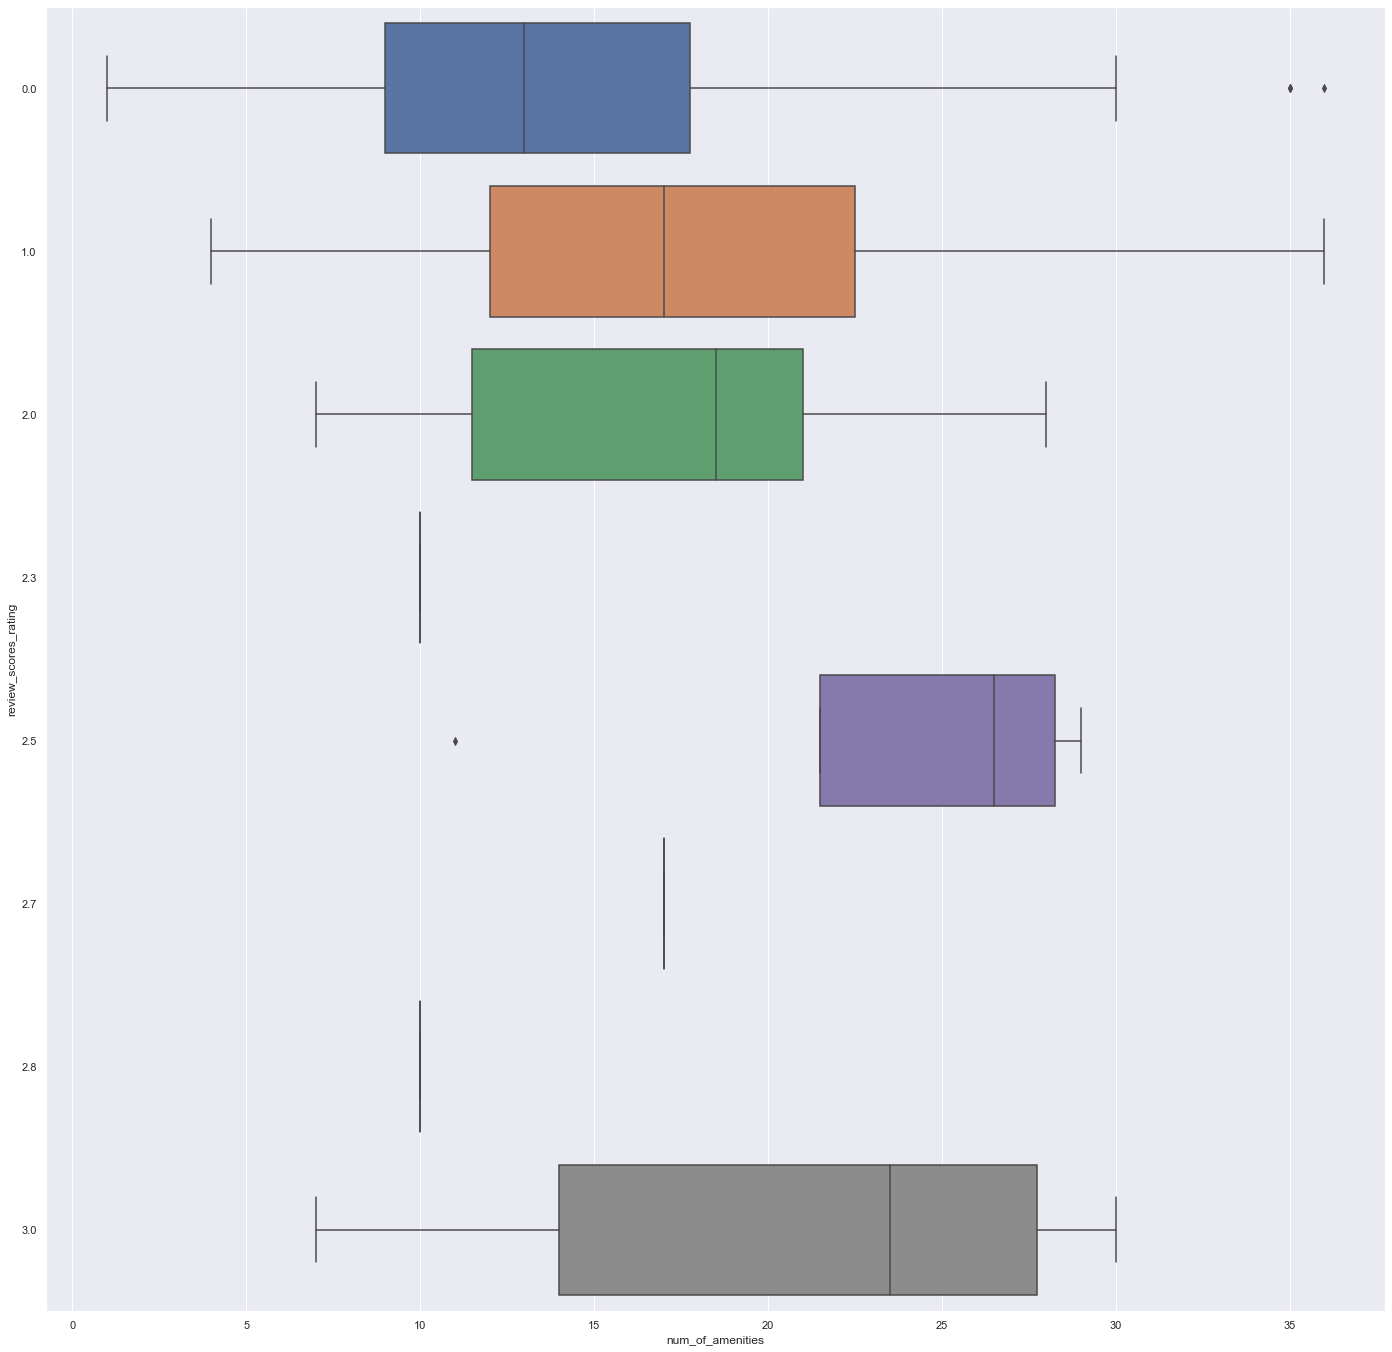

In [28]:
test = pd.DataFrame(top_air[['num_of_amenities','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_amenities', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_veri', ylabel='review_scores_rating'>

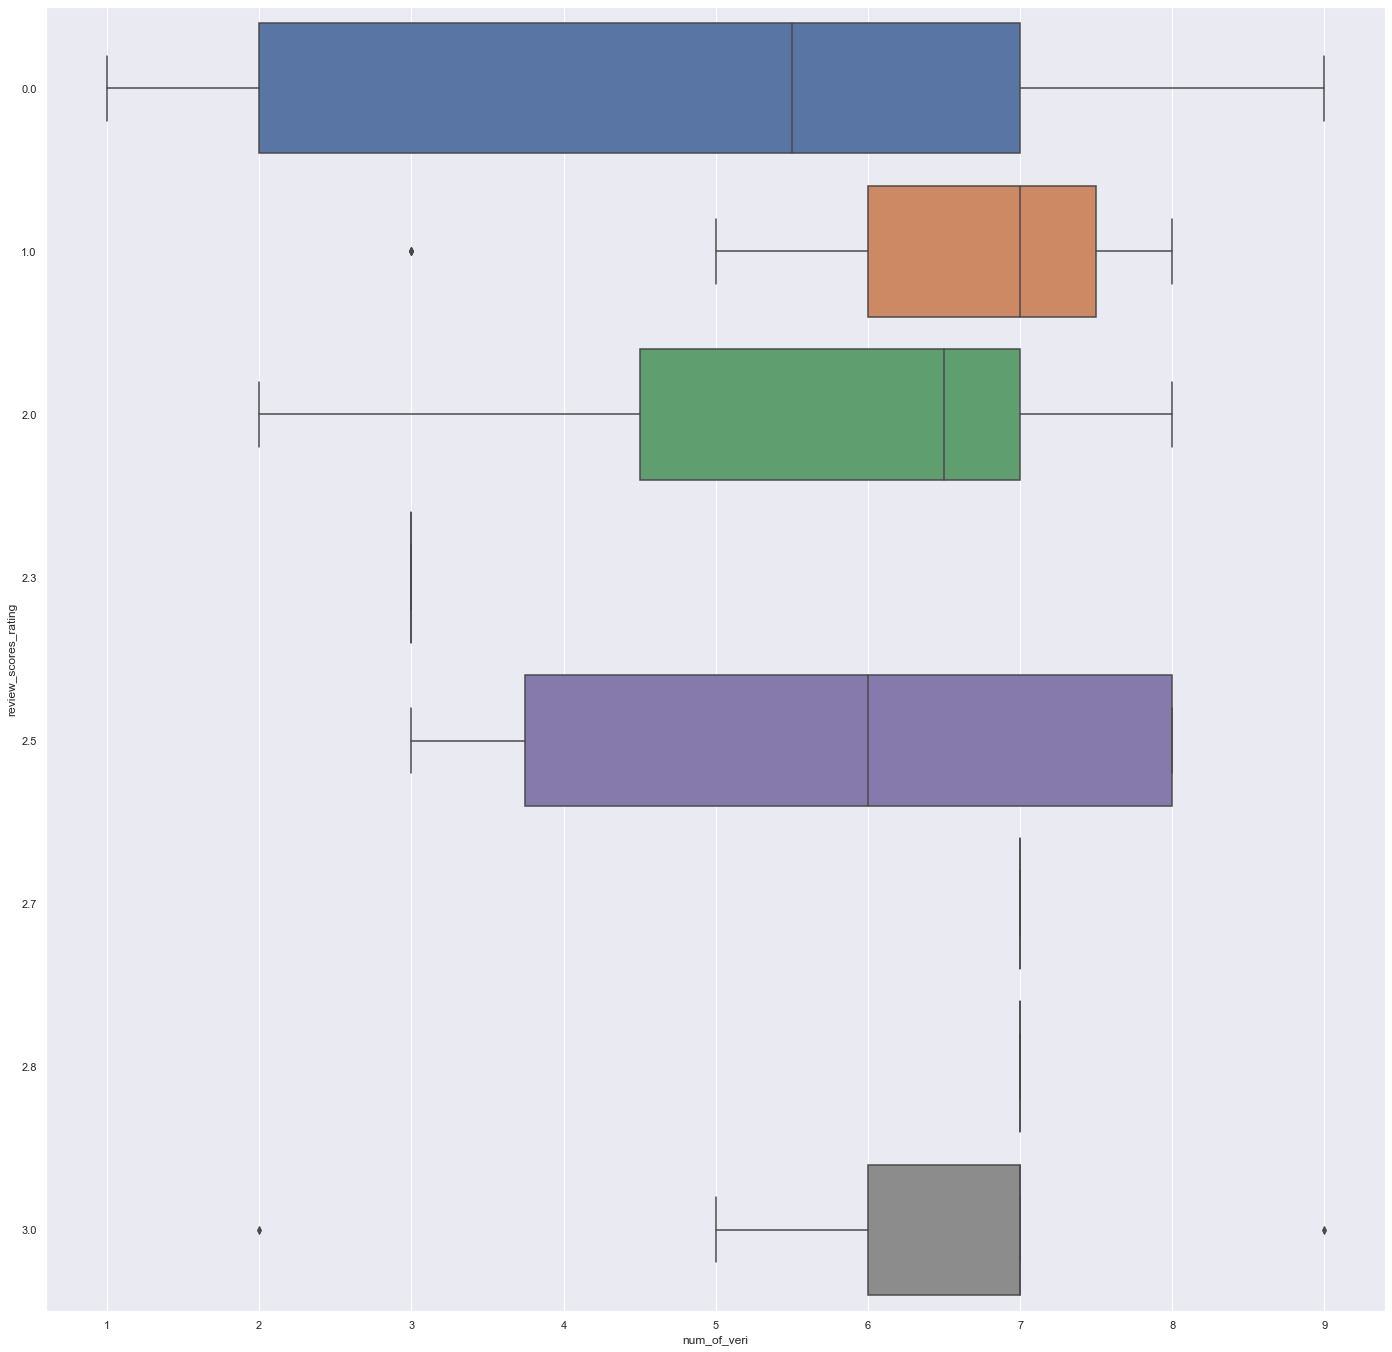

In [29]:
test = pd.DataFrame(top_air[['num_of_veri','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_veri', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_veri', ylabel='review_scores_rating'>

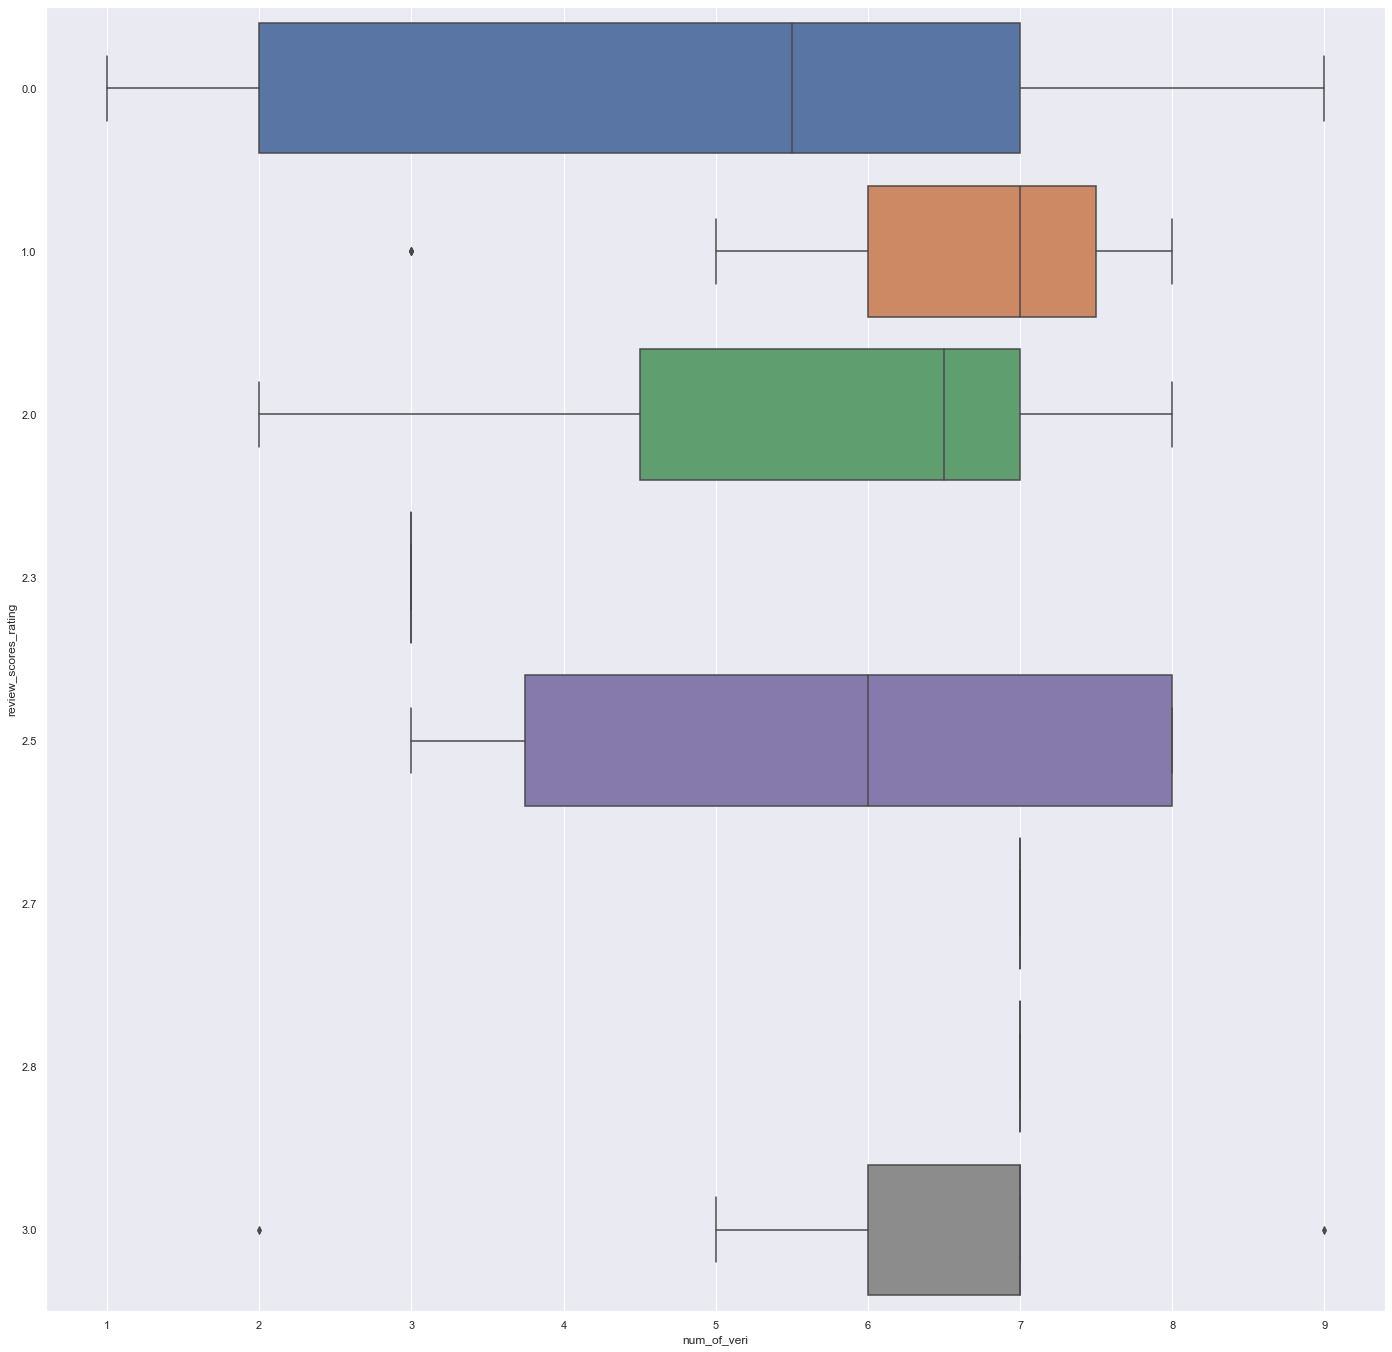

In [30]:
test = pd.DataFrame(top_air[['num_of_veri','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_veri', y="review_scores_rating", data=test,orient = "h")

# Putting price and amenities into the same dataframe to compare

In [31]:
amenities = zhdf[['price','amenities']]

amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
amenities['amenities'] = amenities['amenities'].apply(str).str.replace('[', '').str.replace(']','').str.replace('"','')

#str.replace(' ','')
#amenities = amenities.to_frame()

amenities.head()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/2700618335.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\User\AppData\Local\Temp/ipykernel_21324/2700618335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\User\AppData\Local\Temp/ipykernel_21324/2700618335.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single ch

,price,amenities
0,81.0,"Air conditioning, Elevator, Wifi, Long term st..."
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym..."
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab..."
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed..."
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed..."


# Check count of how many amenities are there in total

In [32]:
amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')
a = amenities['amenities'].str.split(', ', expand=True).stack().value_counts()
test_df = a.rename_axis('amenities').reset_index(name='count')

C:\Users\User\AppData\Local\Temp/ipykernel_21324/3105268720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')


In [43]:
print_full(test_df)

                                             amenities  count
0                              Long term stays allowed   4157
1                                     Air conditioning   4107
2                                                 Wifi   4086
3                                           Essentials   3641
4                                               Washer   3603
5                                              Hangers   3432
6                                              Kitchen   3335
7                                                 Iron   3247
8                                  Dedicated workspace   3186
9                                           Hair dryer   3004
10                                               Dryer   2794
11                                           Hot water   2697
12                                             Shampoo   2670
13                                        Refrigerator   2217
14                                            Elevator   2147
15      

# Bar graph of amenity count

<BarContainer object of 15 artists>

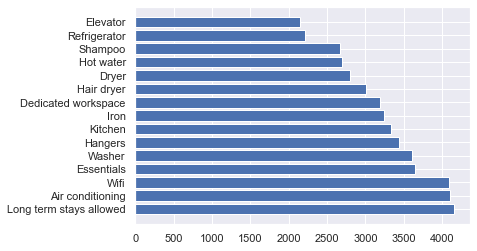

In [44]:
plt.barh(test_df['amenities'].head(15), test_df['count'].head(15))

# Put price and rating into same dataframe to compare

In [45]:
pricedf = zhdf[['price', 'review_scores_rating']]
pricedf.head()

,price,review_scores_rating
0,$81.00,5.00
1,$80.00,4.56
2,$67.00,4.88
3,$177.00,4.44
4,$81.00,4.16


In [46]:
#remove extra unnecessary symbols and change price to float
pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
pricedf.head()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/1771786605.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\User\AppData\Local\Temp/ipykernel_21324/1771786605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)


,price,review_scores_rating
0,81.0,5.00
1,80.0,4.56
2,67.0,4.88
3,177.0,4.44
4,81.0,4.16


# Plot ratings against price

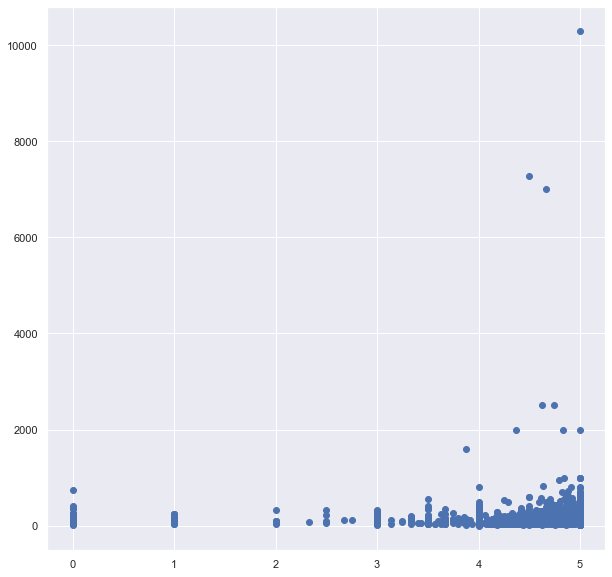

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(pricedf['review_scores_rating'], pricedf['price'])

In [48]:
test_df.head()

,amenities,count
0,Long term stays allowed,4157
1,Air conditioning,4107
2,Wifi,4086
3,Essentials,3641
4,Washer,3603


# Count number of amenities PER listing

In [49]:
amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)
amenities.head()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/2564024349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)


,price,review_scores_rating,amenities,amenities_count
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Regression plot for price against amenities count per listing

<AxesSubplot:xlabel='amenities_count', ylabel='price'>

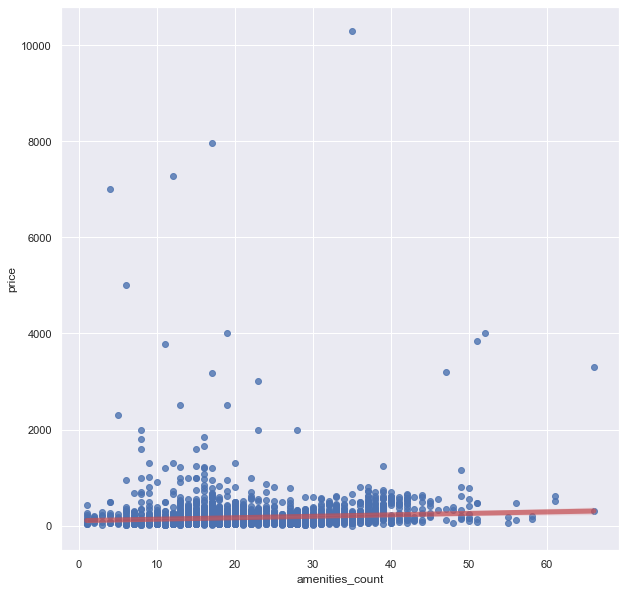

In [50]:
plt.figure(figsize=(10,10))
sb.regplot(y=amenities['price'], x=amenities['amenities_count'], line_kws={"color":"r","alpha":0.7,"lw":5})

In [51]:
amenities.insert(1, 'review_scores_rating', zhdf['review_scores_rating'])
amenities.head()

jointDF = pd.concat([days_created, review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")

ValueError: cannot insert review_scores_rating, already exists

# Scatter plot of amenity count against ratings

<AxesSubplot:xlabel='review_scores_rating', ylabel='amenities_count'>

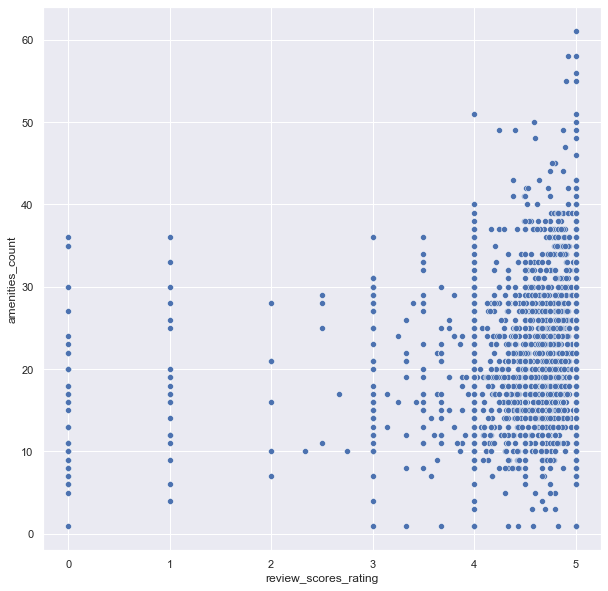

In [52]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=amenities['review_scores_rating'], y=amenities['amenities_count'])

In [53]:
amenity_list_top = test_df['amenities'].head(15)
print(amenity_list_top)

0     Long term stays allowed
1            Air conditioning
2                        Wifi
3                  Essentials
4                      Washer
5                     Hangers
6                     Kitchen
7                        Iron
8         Dedicated workspace
9                  Hair dryer
10                      Dryer
11                  Hot water
12                    Shampoo
13               Refrigerator
14                   Elevator
Name: amenities, dtype: object


In [54]:
#check amenity list against amenity column to see if it exists, then
#then append column to dataframe

for i in amenity_list_top:
    amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))
    
amenities.head()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/1343124337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))


,price,review_scores_rating,amenities,amenities_count,has_long term stays allowed,has_air conditioning,has_wifi,has_essentials,has_washer,has_hangers,has_kitchen,has_iron,has_dedicated workspace,has_hair dryer,has_dryer,has_hot water,has_shampoo,has_refrigerator,has_elevator
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True


<h1> Heat Map to show AirBnb Listings </h1>

<p> We will need to install folium, a library used to visualize geo-spatial data </p>

In [55]:
pip install folium

In [56]:
import folium
from folium.plugins import HeatMap

In [57]:
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)
HeatMap(air_data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)  

In [58]:
# Multi bins
review_bins = [0, 1, 2,3,4, 5]
review_labels = ["very bad", "ok", "good", "very good"]


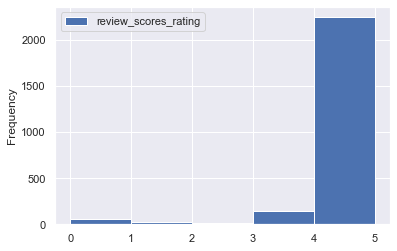

In [59]:
review_scores_rating = pd.DataFrame(air_data['review_scores_rating']).copy()
h = review_scores_rating.plot.hist(by = "review_scores_rating", bins = review_bins)


In [60]:
outlier_ratings = air_data[air_data['review_scores_rating']<=2.0]

In [61]:
outlier_ratings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
266,6607671,https://www.airbnb.com/rooms/6607671,20210629180711,2021-06-29,Central Entired Condo Apartment -min walk to 3...,Apartment in Central Singapore with condo faci...,[Nearby Places]<br />1. City Square Mall:<br /...,https://a0.muscache.com/pictures/83244799/b815...,21149720,https://www.airbnb.com/users/show/21149720,...,5.0,4.0,4.0,NaN,f,16,16,0,0,0.02
335,7766300,https://www.airbnb.com/rooms/7766300,20210629180711,2021-06-30,Private room,Fully furnished <br />All facilities near by<b...,NaN,https://a0.muscache.com/pictures/98775103/80ad...,31212677,https://www.airbnb.com/users/show/31212677,...,1.0,1.0,1.0,NaN,t,2,0,2,0,0.04
351,7996456,https://www.airbnb.com/rooms/7996456,20210629180711,2021-06-29,Room in heartlands,This is my room ..Rather basic with air condit...,I live in the heartlands of Singapore. Jurong ...,https://a0.muscache.com/pictures/101916427/d12...,34262041,https://www.airbnb.com/users/show/34262041,...,NaN,NaN,NaN,NaN,f,1,0,0,1,0.02
403,8681954,https://www.airbnb.com/rooms/8681954,20210629180711,2021-06-30,The private room is bright so.,Welcome!<br />The room is located on the secon...,NaN,https://a0.muscache.com/pictures/110157544/d3e...,29977398,https://www.airbnb.com/users/show/29977398,...,1.0,1.0,2.0,NaN,f,3,0,3,0,0.02
423,9105592,https://www.airbnb.com/rooms/9105592,20210629180711,2021-06-29,Private Room for 2,Clean and spacious. Free WIFI 24 hrs.<br /><br...,Its a busy neighbourhood area.<br /><br />5 mi...,https://a0.muscache.com/pictures/1eb1a9e4-40cd...,39205735,https://www.airbnb.com/users/show/39205735,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.03


In [62]:
outlier_ratings['neighbourhood_cleansed'].head()

266        Kallang
335        Punggol
351    Jurong East
403      Pasir Ris
423         Yishun
Name: neighbourhood_cleansed, dtype: object

In [63]:
outlier_ratings['accommodates'].head()

266    6
335    2
351    1
403    2
423    2
Name: accommodates, dtype: int64

In [64]:
outlier_ratings['price'].head()

266    181.0
335     55.0
351     50.0
403     32.0
423     80.0
Name: price, dtype: float32

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'review_scores_rating'),
 Text(0, 0.5, 'neighbourhood_cleansed'),

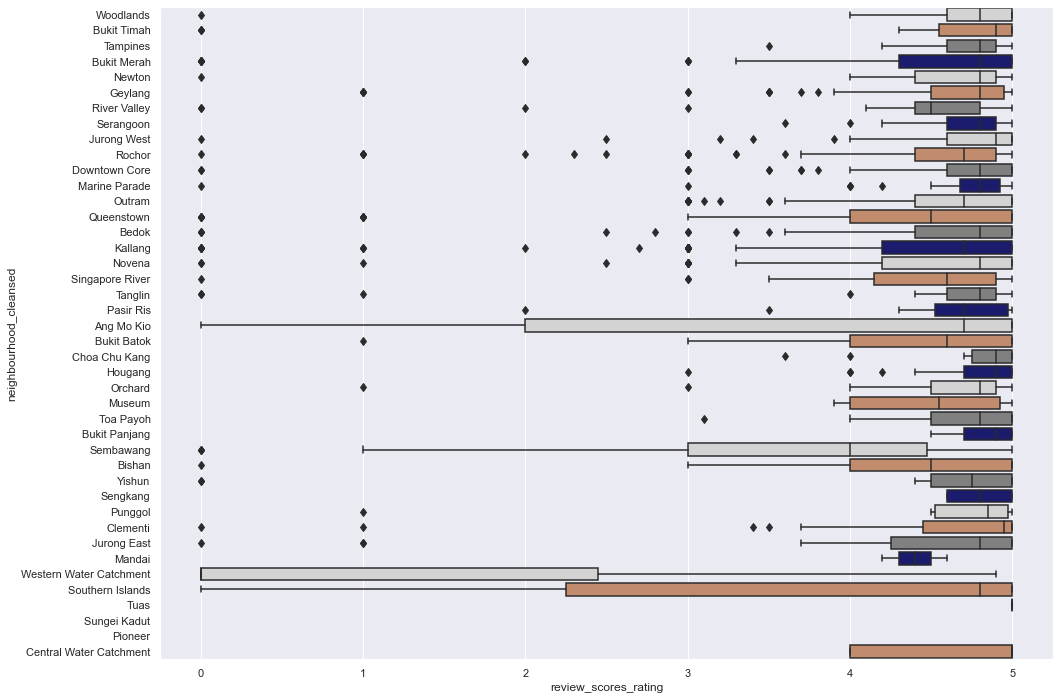

In [65]:
plt.figure(figsize=(16,12))
p = sb.boxplot("review_scores_rating", "neighbourhood_cleansed", data = air_data, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
p.set(xlabel = "review_scores_rating", ylabel = "neighbourhood_cleansed", xticks = range(6))

In [66]:
from datetime import datetime
date_created = pd.to_datetime(air_data['host_since'], infer_datetime_format=True)
curr_time = pd.to_datetime("now")

In [67]:
air_data['days_created'] = (curr_time - date_created).dt.days
days_created = air_data['days_created']
days_created = days_created.astype(float)
review = air_data['review_scores_rating']

<AxesSubplot:>

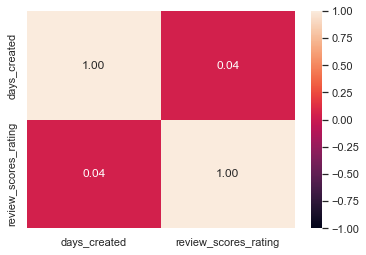

In [68]:
jointDF = pd.concat([days_created, review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")

<AxesSubplot:xlabel='review_scores_rating', ylabel='days_created'>

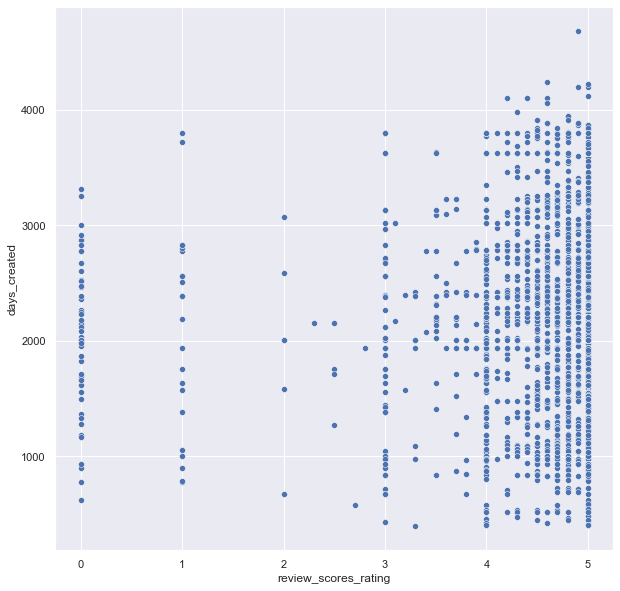

In [69]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=air_data['review_scores_rating'], y=air_data['days_created'])

In [75]:
is_superHost = air_data[air_data['host_is_superhost']=='t']
not_superHost = air_data[air_data['host_is_superhost']=='f']

In [76]:
is_superHost['description'].head()

29    Our premier suite is a lovely large room with ...
33    Perfect sharing space. 2 bedrooms, each have t...
34    Bright and airy suite with high ceilings, fan,...
40    Home sweet home. That's exactly you will feel ...
41    A beautiful apartment conveniently located alo...
Name: description, dtype: object

In [77]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
amenitiesDF = air_data[['amenities','review_scores_rating','id',]]
sorted_amenities = amenitiesDF.sort_values('review_scores_rating',ascending=[0])
top_amenitiesDF=sorted_amenities.head(30)
amenities_grp = ''
for index,row in top_amenitiesDF.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    amenities_grp+=p

amenities_grp_words =nltk.word_tokenize(amenities_grp)
filtered_data=[word for word in amenities_grp_words if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
amenities_grp_words=[wnl.lemmatize(data) for data in filtered_data]
amenities_words=' '.join(amenities_grp_words)

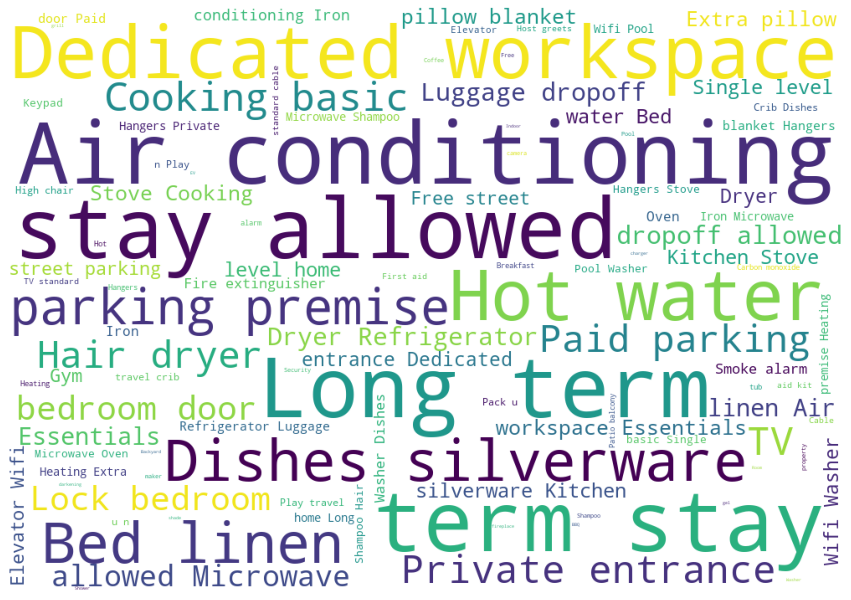

In [80]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(amenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [81]:
percentage = air_data['host_response_rate'].str.rstrip('%').astype('float') 

In [82]:
percentage.head()

0    100.0
1      NaN
2    100.0
3    100.0
4    100.0
Name: host_response_rate, dtype: float64

<AxesSubplot:>

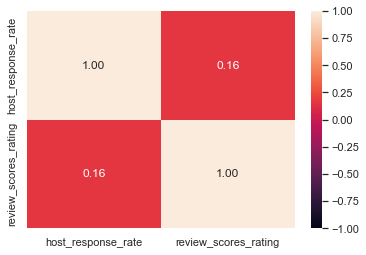

In [83]:
jointDF = pd.concat([percentage, review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")

In [84]:
price_cleansed = air_data.loc[(air_data['price'].astype(float) < 1200)]

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

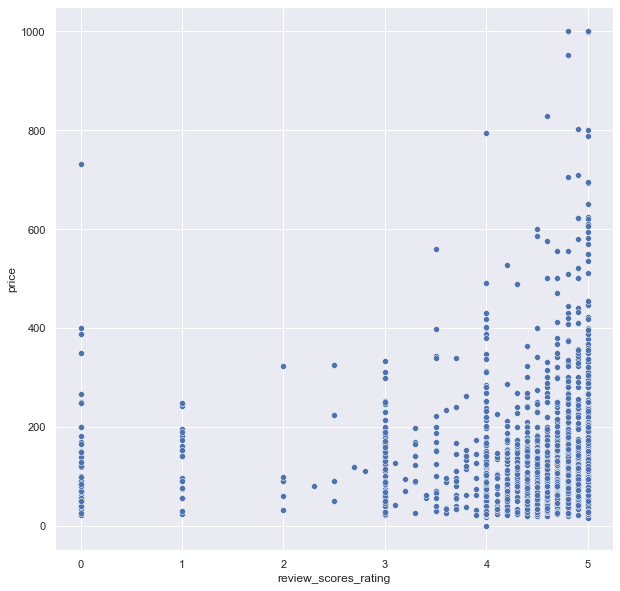

In [85]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=air_data['review_scores_rating'], y=price_cleansed['price'])

<AxesSubplot:>

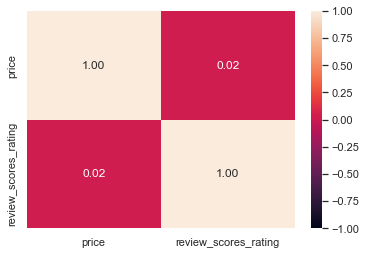

In [89]:
jointDF = pd.concat([price_cleansed['price'], review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")